# Exploratory Data Analysis

In this section, we will perform data profiling on the training dataset - `customer.csv`.
The objective of this section is to understand the data that will be used to train the model, making use of statistics and visualizations, in order to identify potential issues that need to be addressed in the data preprocessing section.

In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [177]:
df = pd.read_csv('../data/customer.csv')
rows,features = df.shape
print(f"Data set has {rows} rows with {features} features\n")
print(f"Features:")
list(df.columns)

Data set has 72458 rows with 15 features

Features:


['Unnamed: 0',
 'custid',
 'sex',
 'is_employed',
 'income',
 'marital_status',
 'health_ins',
 'housing_type',
 'num_vehicles',
 'age',
 'state_of_res',
 'code_column',
 'gas_usage',
 'rooms',
 'recent_move_b']

In [178]:
print(df.isnull().sum())
t_sum = df.isnull().sum().sum()
percentual = t_sum/(len(df)*len(df.columns))*100
print(f'\nTotal NaN values {t_sum}')
print(f'{percentual}% of missing values')
print(f'Total Duplicated rows {df.duplicated().sum()}')

Unnamed: 0            0
custid                0
sex                   0
is_employed       25515
income                0
marital_status        0
health_ins            0
housing_type       1686
num_vehicles       1686
age                   0
state_of_res          0
code_column           0
gas_usage          1686
rooms                 0
recent_move_b      1687
dtype: int64

Total NaN values 32260
2.968156265238713% of missing values
Total Duplicated rows 0


As we can see the DataSet have 32260 missing values ​​this corresponds to approximately 2.97% of the values, most of them in is_emplyed.
There are no duplicated rows.

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72458 entries, 0 to 72457
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      72458 non-null  int64  
 1   custid          72458 non-null  object 
 2   sex             72458 non-null  object 
 3   is_employed     46943 non-null  object 
 4   income          72458 non-null  float64
 5   marital_status  72458 non-null  object 
 6   health_ins      72458 non-null  bool   
 7   housing_type    70772 non-null  object 
 8   num_vehicles    70772 non-null  float64
 9   age             72458 non-null  int64  
 10  state_of_res    72458 non-null  object 
 11  code_column     72458 non-null  int64  
 12  gas_usage       70772 non-null  float64
 13  rooms           72458 non-null  int64  
 14  recent_move_b   70771 non-null  object 
dtypes: bool(1), float64(3), int64(4), object(7)
memory usage: 7.8+ MB


now let's analyze each feature, as custid and unnamed have no duplicate or missing values, and both correspond to the row and id respectively, we will not analyze them because they are useless for the evaluation.

## Sex

In [180]:
df['sex'].describe()

count      72458
unique         2
top       Female
freq       37461
Name: sex, dtype: object

sex
Female            37461
Male              34997
Missing values        0
Name: count, dtype: int64


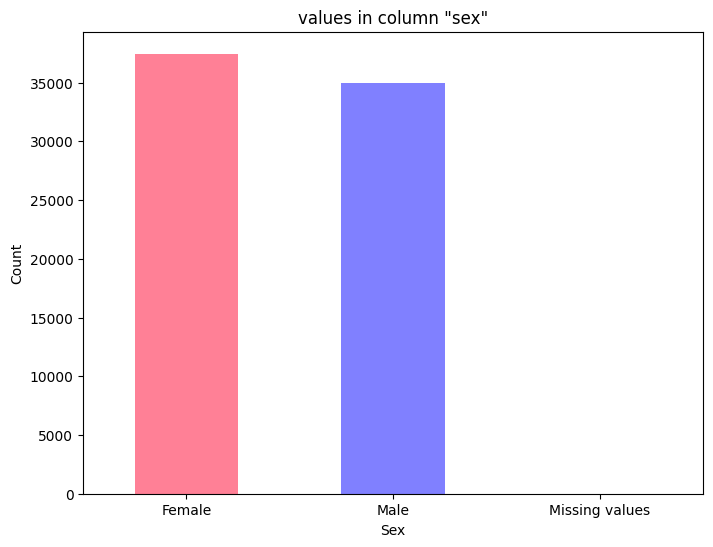

In [181]:
sex_counts = df['sex'].value_counts()
sex_counts['Missing values'] = df['sex'].isnull().sum()
print(sex_counts)
plt.figure(figsize=(8, 6)) 
sex_counts.plot(kind='bar',color=['#FF8096','#8080FF'])
plt.title('values in column "sex"')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

The data is balanced and there are no missing values.

## is_imployed

In [182]:
df['is_employed'].describe()

count     46943
unique        2
top        True
freq      44630
Name: is_employed, dtype: object

is_employed
True              44630
False              2313
Missing values    25515
Name: count, dtype: int64


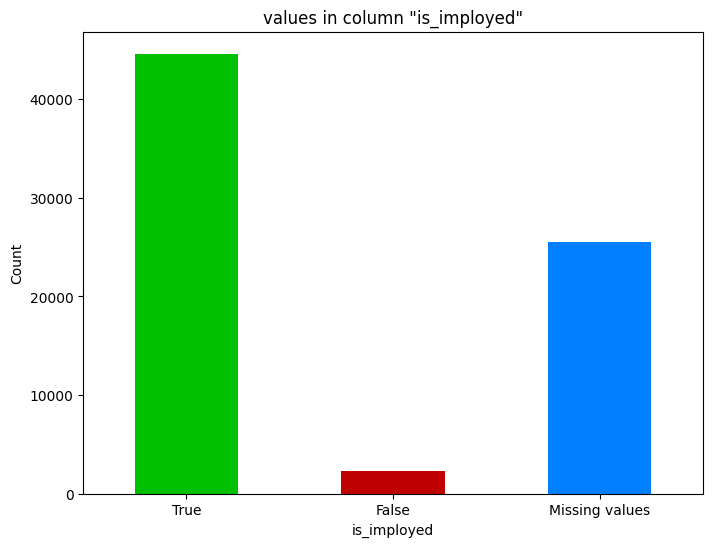

In [183]:
is_imployed_counts = df['is_employed'].value_counts()
is_imployed_counts['Missing values'] = df['is_employed'].isnull().sum()
print(is_imployed_counts)
plt.figure(figsize=(8, 6)) 
is_imployed_counts.plot(kind='bar',color=['#00C000','#BF0000','#0080FF'])
plt.title('values in column "is_imployed"')
plt.xlabel('is_imployed')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

The data is not balanced and there are 25515 missing values, which is not good.

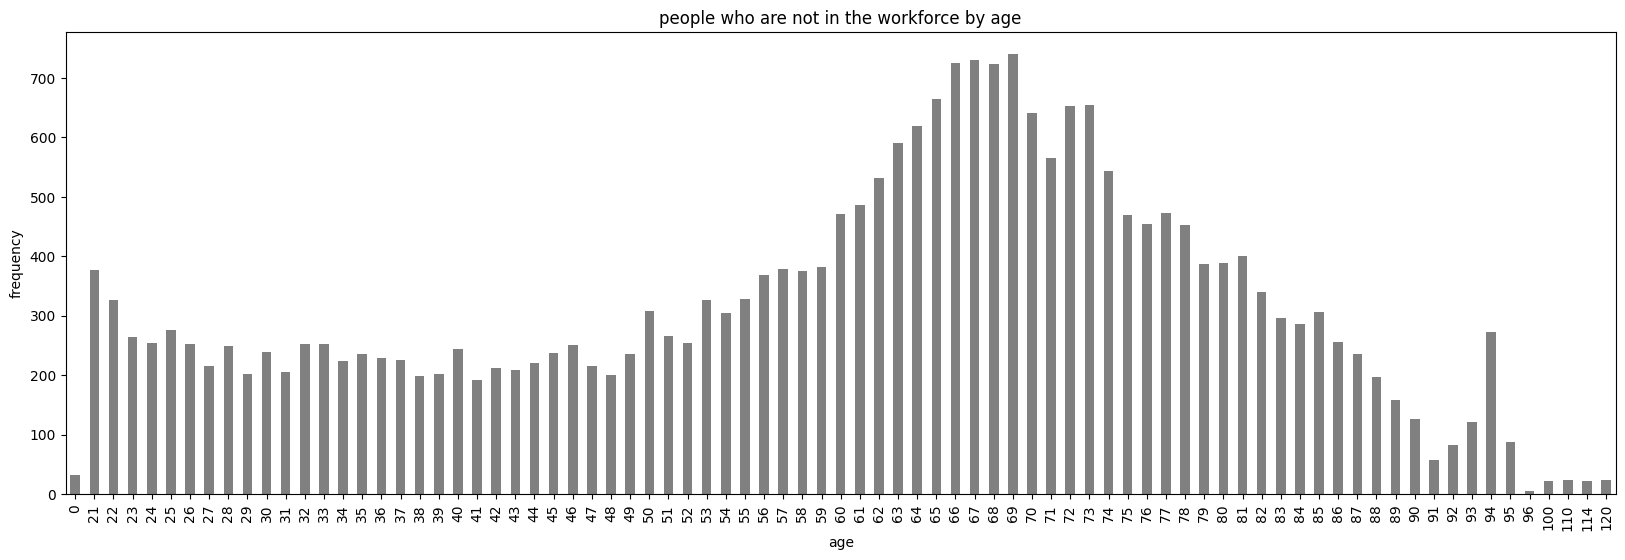

In [184]:
df_nan_isemployed = df[df['is_employed'].isnull()]
age_in_is_imployed_missing_values_counts = df_nan_isemployed['age'].value_counts()
age_in_is_imployed_missing_values_counts = age_in_is_imployed_missing_values_counts.sort_index()
plt.figure(figsize=(20, 6)) 
age_in_is_imployed_missing_values_counts.plot(kind='bar',color=['gray'])
plt.title('people who are not in the workforce by age')
plt.xlabel('age')
plt.ylabel('frequency')
plt.xticks(rotation=90)
plt.show()

we can see that the null values ​​extend across all ages

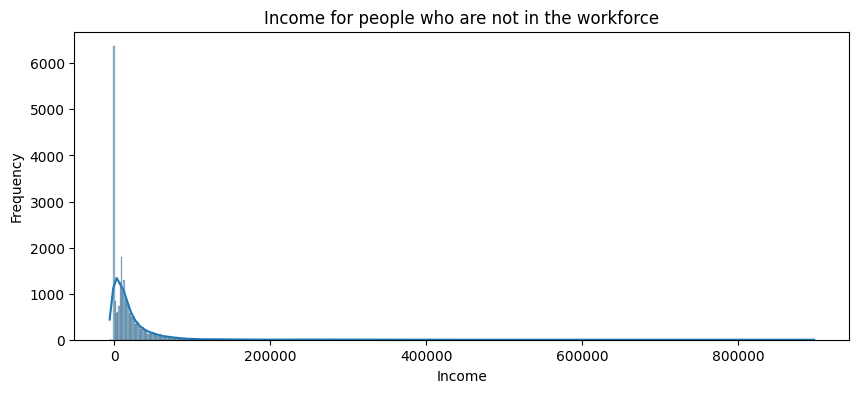

In [185]:
plt.figure(figsize=(10, 4))
sns.histplot(df_nan_isemployed['income'].dropna(), kde=True)
plt.title("Income for people who are not in the workforce") 
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

Some of them have income 

## Income

In [186]:
df['income'].describe()

count    7.245800e+04
mean     4.188143e+04
std      5.827460e+04
min     -6.900000e+03
25%      1.070000e+04
50%      2.640000e+04
75%      5.200000e+04
max      1.257000e+06
Name: income, dtype: float64

In [187]:
df[df['income'] < 0].head()

,Unnamed: 0,custid,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b
379,542,000582425_02,Male,True,-1500.0,Married,True,Homeowner free and clear,5.0,61,Alabama,1047,50.0,3,F
557,780,000841705_03,Female,True,-6800.0,Married,True,Homeowner free and clear,2.0,60,Alabama,1047,3.0,5,F
1281,1808,000078804_02,Male,True,-4500.0,Married,True,Homeowner with mortgage/loan,2.0,36,Arizona,1534,40.0,3,F
2968,4199,000616218_01,Male,True,-6900.0,Married,True,Rented,2.0,120,Arkansas,653,60.0,2,F
8089,11343,000819312_01,Male,True,-5800.0,Married,False,Homeowner free and clear,6.0,22,California,8962,60.0,4,F


Maybe negative values for income are errors

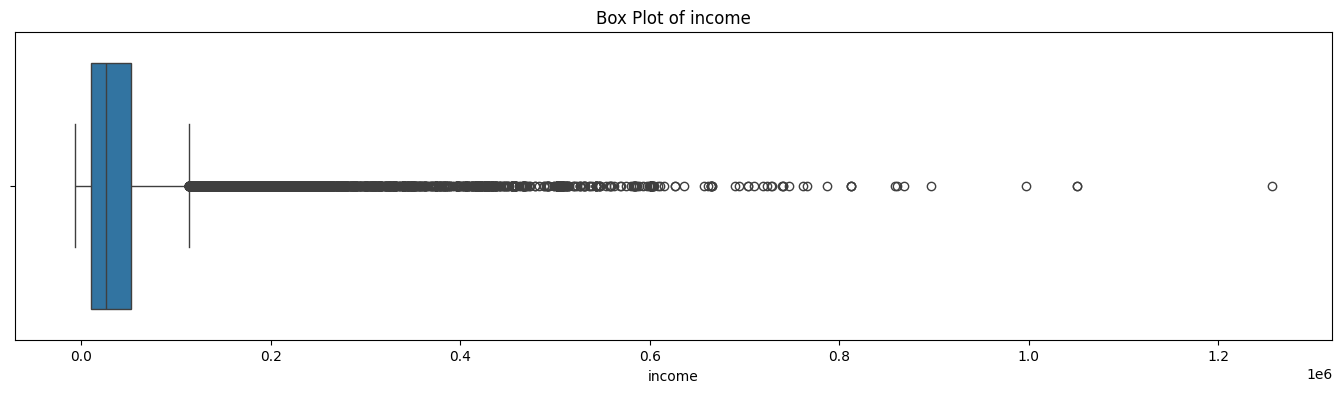

In [188]:
plt.figure(figsize=(17, 4))
sns.boxplot(x=df['income'])
plt.title(f'Box Plot of income')
plt.show()

Income have a lot of outliers and his distribution is not a normal distribution 

## Marital_status

In [189]:
print(df['marital_status'].unique())
print(df['marital_status'].describe())

['Never married' 'Divorced/Separated' 'Widowed' 'Married']
count       72458
unique          4
top       Married
freq        38040
Name: marital_status, dtype: object


marital_status
Married               38040
Never married         19120
Divorced/Separated    10572
Widowed                4726
Missing values            0
Name: count, dtype: int64


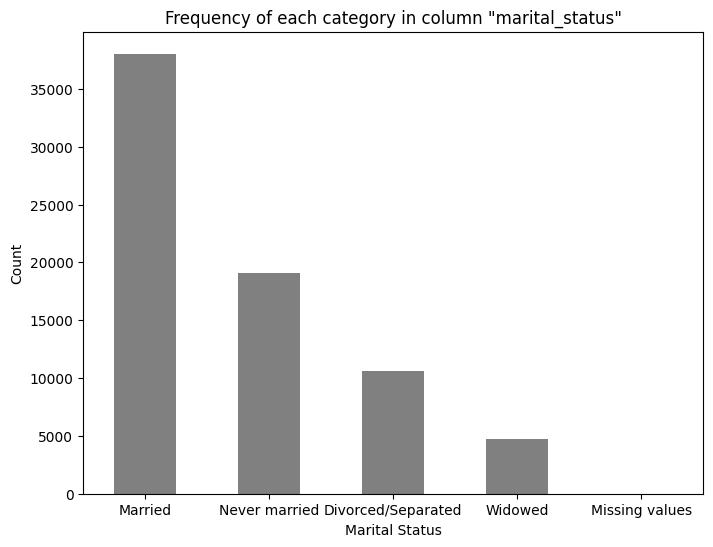

In [190]:
martital_status_counts = df['marital_status'].value_counts()
martital_status_counts['Missing values'] = df['marital_status'].isnull().sum()
print(martital_status_counts)
plt.figure(figsize=(8, 6)) 
martital_status_counts.plot(kind='bar',color=['gray'])
plt.title('Frequency of each category in column "marital_status"')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Marital_status, has no missing values and almost half of the dataset is married

## Health_ins

In [191]:
df['health_ins'].describe()

count     72458
unique        2
top        True
freq      65553
Name: health_ins, dtype: object

health_ins
True              65553
False              6905
Missing values        0
Name: count, dtype: int64


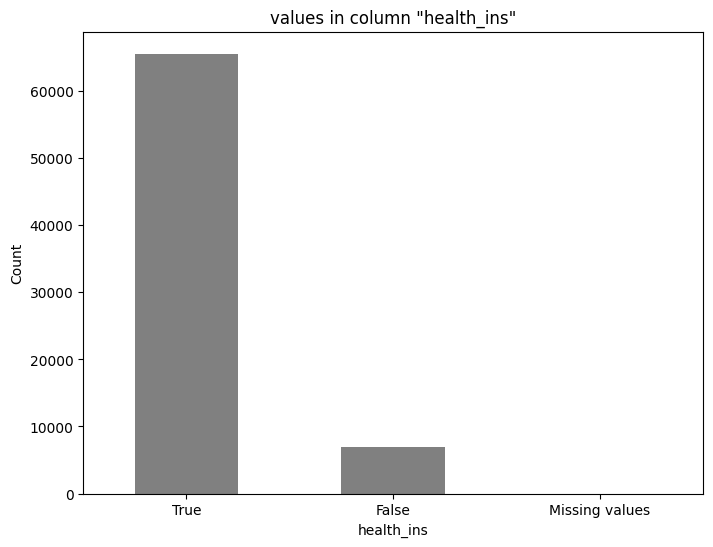

In [192]:
health_ins_counts = df['health_ins'].value_counts()
health_ins_counts['Missing values'] = df['health_ins'].isnull().sum()
print(health_ins_counts)
plt.figure(figsize=(8, 6)) 
health_ins_counts.plot(kind='bar',color=['gray'])
plt.title('values in column "health_ins"')
plt.xlabel('health_ins')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Health_ins, has no missing values and is extremely unbalanced... This can be a problem for the classification task

## Housing_type

housing_type
Homeowner with mortgage/loan    31092
Rented                          21956
Homeowner free and clear        16604
Occupied with no rent            1120
Missing values                   1686
Name: count, dtype: int64


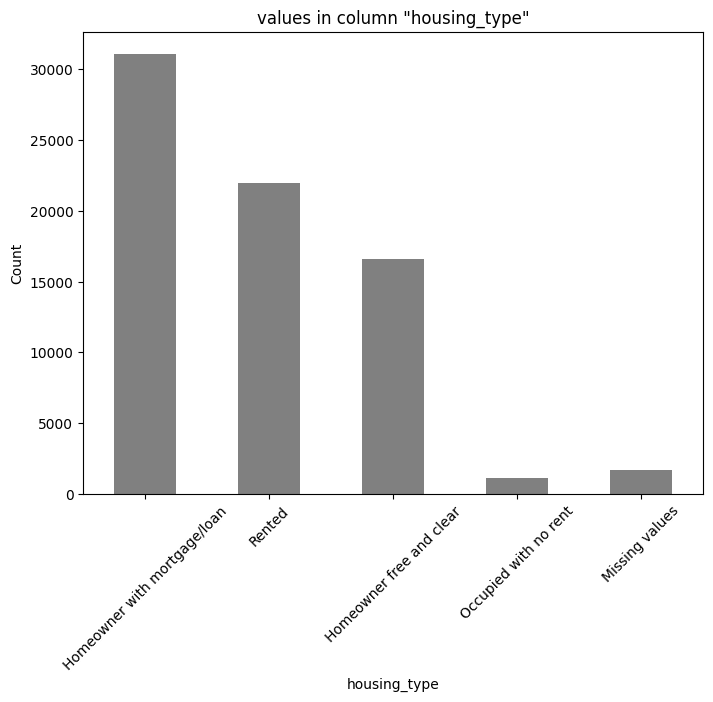

In [193]:
housing_type_counts = df['housing_type'].value_counts()
housing_type_counts['Missing values'] = df['housing_type'].isnull().sum()
print(housing_type_counts)
plt.figure(figsize=(8, 6)) 
housing_type_counts.plot(kind='bar',color=['gray'])
plt.title('values in column "housing_type"')
plt.xlabel('housing_type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Housing_type, has 1686 missing values

housing_type
Homeowner free and clear        59.326548
Homeowner with mortgage/loan    48.504052
Occupied with no rent           49.671429
Rented                          42.548552
Name: age, dtype: float64


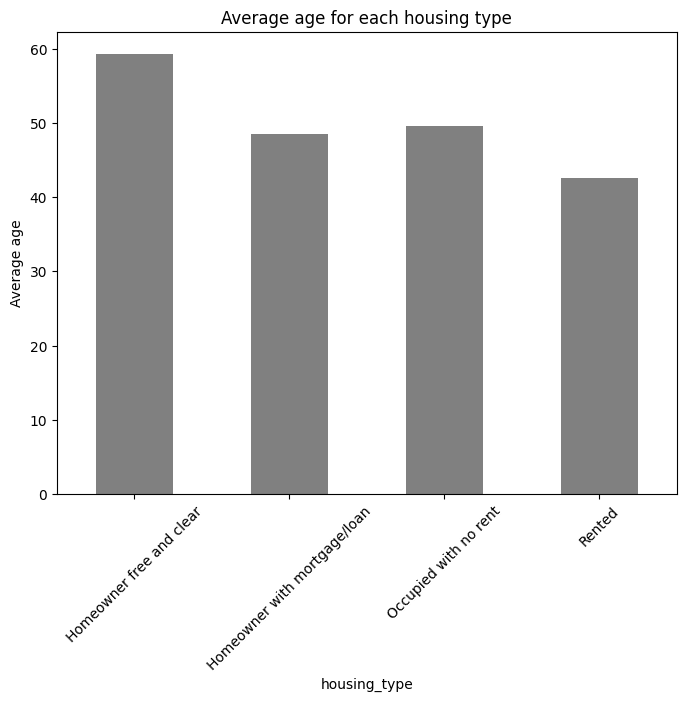

In [194]:
# Average age for each housing type
housing_type_age = df.groupby('housing_type')['age'].mean()
print(housing_type_age)
plt.figure(figsize=(8, 6))
housing_type_age.plot(kind='bar',color=['gray'])
plt.title('Average age for each housing type')
plt.xlabel('housing_type')
plt.ylabel('Average age')
plt.xticks(rotation=45)
plt.show()

## Num_vehicles

In [195]:
df['num_vehicles'].describe()

count    70772.000000
mean         2.066820
std          1.170076
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_vehicles, dtype: float64

num_vehicles
2.0               28052
1.0               17445
3.0               13094
4.0                5100
0.0                4636
5.0                1628
6.0                 817
Missing values     1686
Name: count, dtype: int64


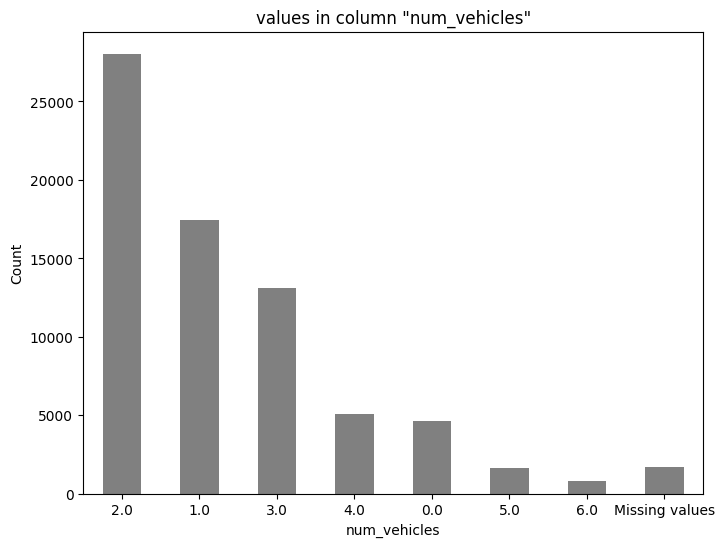

In [196]:
num_vehicles_counts = df['num_vehicles'].value_counts()
num_vehicles_counts['Missing values'] = df['num_vehicles'].isnull().sum()
print(num_vehicles_counts)
plt.figure(figsize=(8, 6)) 
num_vehicles_counts.plot(kind='bar',color=['gray'])
plt.title('values in column "num_vehicles"')
plt.xlabel('num_vehicles')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

num_vehicles, has 1686 missing values

/var/folders/sv/gxsvk5v96llb5jl5wq8sxllh0000gn/T/ipykernel_46647/1481514004.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_vehicles = df.groupby('age_group')['num_vehicles'].mean()


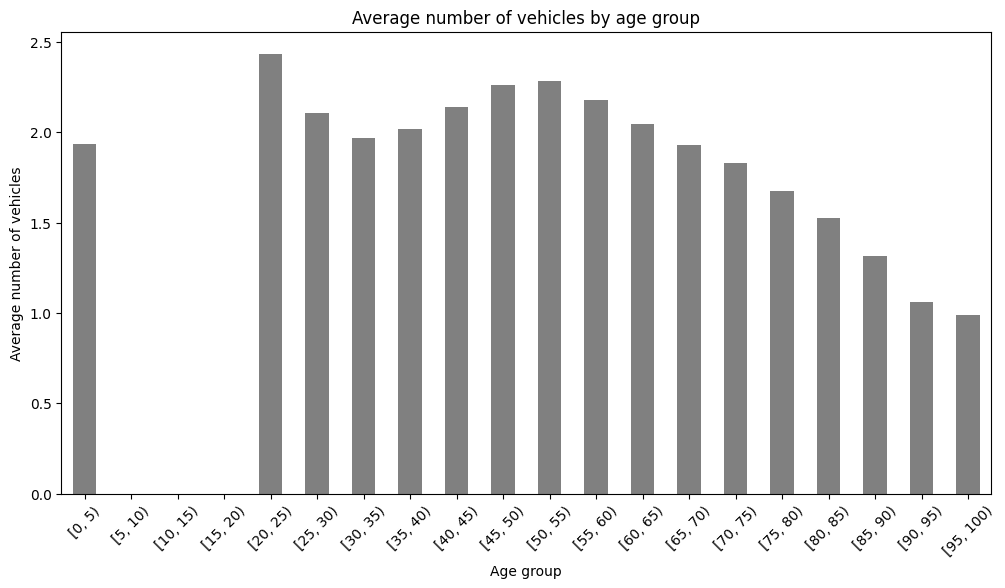

In [197]:
# Number of vehicles by age...
# group ages in 5 year intervals and calculate the average number of vehicles
df['age_group'] = pd.cut(df['age'], bins=range(0, 101, 5), right=False)
age_group_vehicles = df.groupby('age_group')['num_vehicles'].mean()
plt.figure(figsize=(12, 6))
age_group_vehicles.plot(kind='bar',color=['gray'])
plt.title('Average number of vehicles by age group')
plt.xlabel('Age group')
plt.ylabel('Average number of vehicles')
plt.xticks(rotation=45)
plt.show()

## Age

In [198]:
df['age'].describe()

count    72458.000000
mean        49.208893
std         18.090035
min          0.000000
25%         34.000000
50%         48.000000
75%         62.000000
max        120.000000
Name: age, dtype: float64

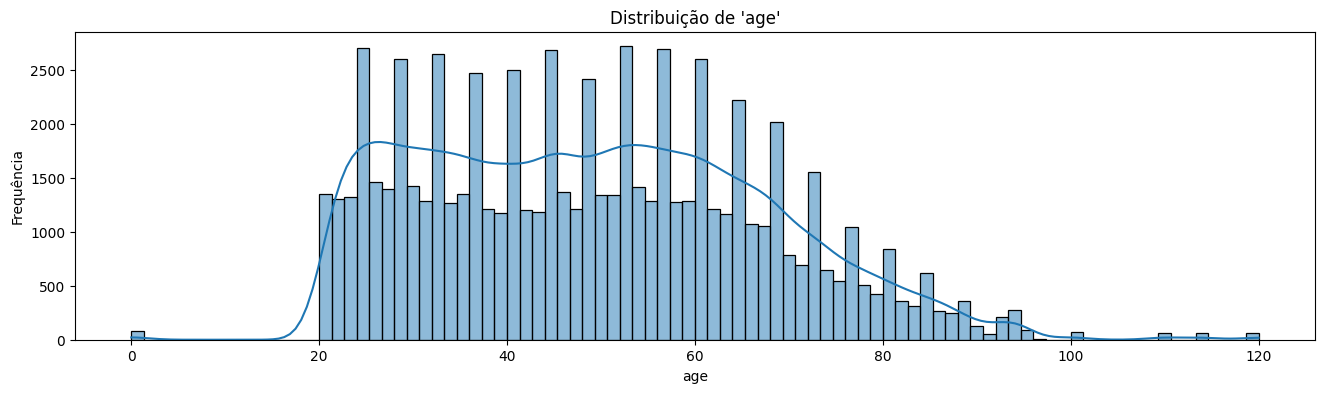

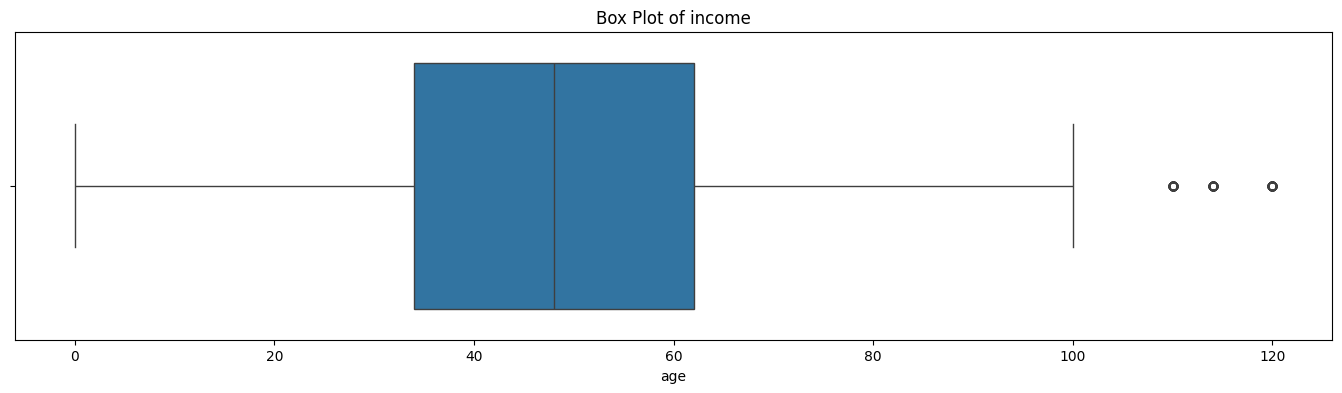

In [199]:
plt.figure(figsize=(16, 4))
sns.histplot(df['age'], kde=True)
plt.title("Distribuição de 'age'") 
plt.xlabel("age")
plt.ylabel("Frequência")
plt.show()

plt.figure(figsize=(17, 4))
sns.boxplot(x=df['age'])
plt.title(f'Box Plot of income')
plt.show()

Age has some atypical factors, not as serious as income.

/var/folders/sv/gxsvk5v96llb5jl5wq8sxllh0000gn/T/ipykernel_46647/3320793308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_age['age_group'] = pd.cut(df_filtered_age['age'], bins=range(20, 110, 10))


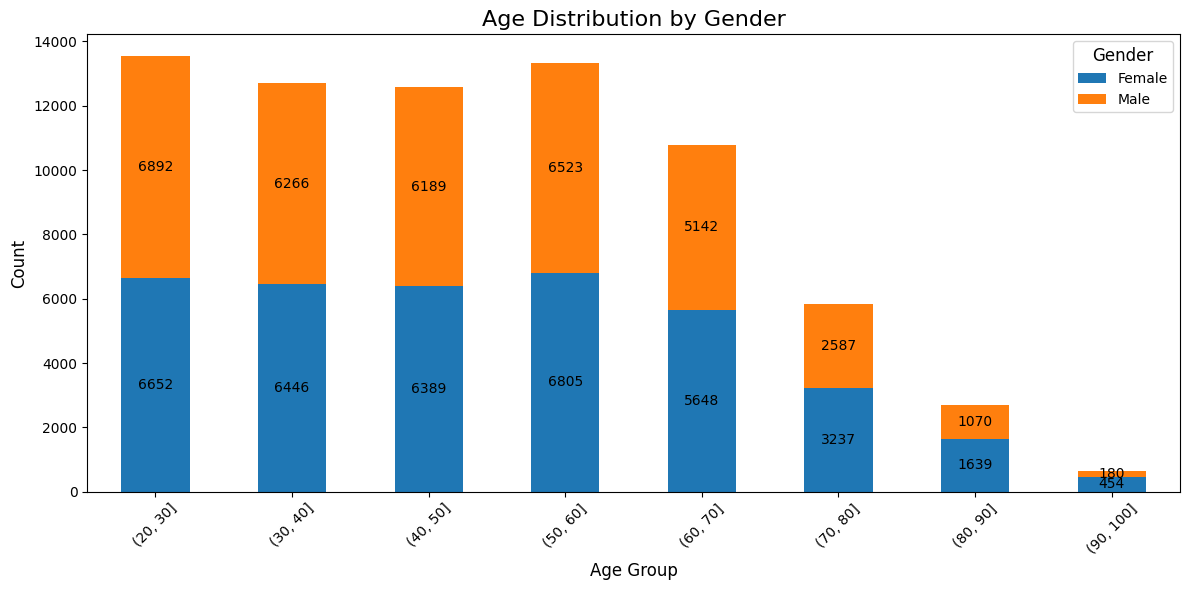

In [200]:
df_filtered_age = df[(df['age'] > 0) & (df['age'] < 100)]
df_filtered_age['age_group'] = pd.cut(df_filtered_age['age'], bins=range(20, 110, 10))
age_gender_counts = df_filtered_age.groupby(['age_group', 'sex'], observed=True).size().unstack()
ax = age_gender_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Age Distribution by Gender', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Gender', title_fontsize=12)
plt.xticks(rotation=45)

for c in ax.containers:
    ax.bar_label(c, label_type='center')

plt.tight_layout()
plt.show()

Genders seem well distributed across ages... but in older people, Females are more present. Does this corroborate with the fact that "Women live longer than men"?

/var/folders/sv/gxsvk5v96llb5jl5wq8sxllh0000gn/T/ipykernel_46647/2413142134.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=marital_age.index, y=marital_age.values, palette='viridis')


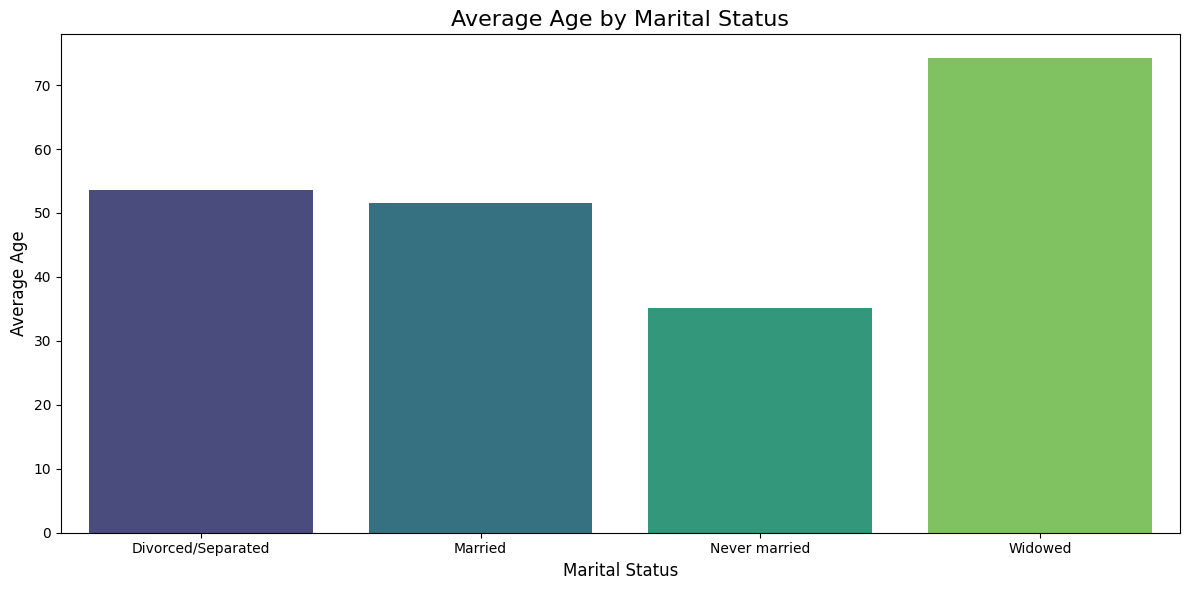

In [201]:
# Correlation between marital status and and age
marital_age = df_filtered_age.groupby('marital_status')['age'].mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=marital_age.index, y=marital_age.values, palette='viridis')
plt.title('Average Age by Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Average Age', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Neevr married people are younger, while widowed people are older. Divorced people are slihghtly older than married people.
These insights seem to be consistent with the real world.

/var/folders/sv/gxsvk5v96llb5jl5wq8sxllh0000gn/T/ipykernel_46647/2758096716.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_age['age_group'] = pd.cut(df_filtered_age['age'], bins=range(20, 110, 5))
/var/folders/sv/gxsvk5v96llb5jl5wq8sxllh0000gn/T/ipykernel_46647/2758096716.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_income = df_filtered_age.groupby('age_group')['income'].mean()
/var/folders/sv/gxsvk5v96llb5jl5wq8sxllh0000gn/T/ipykernel_46647/2758096716.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated 

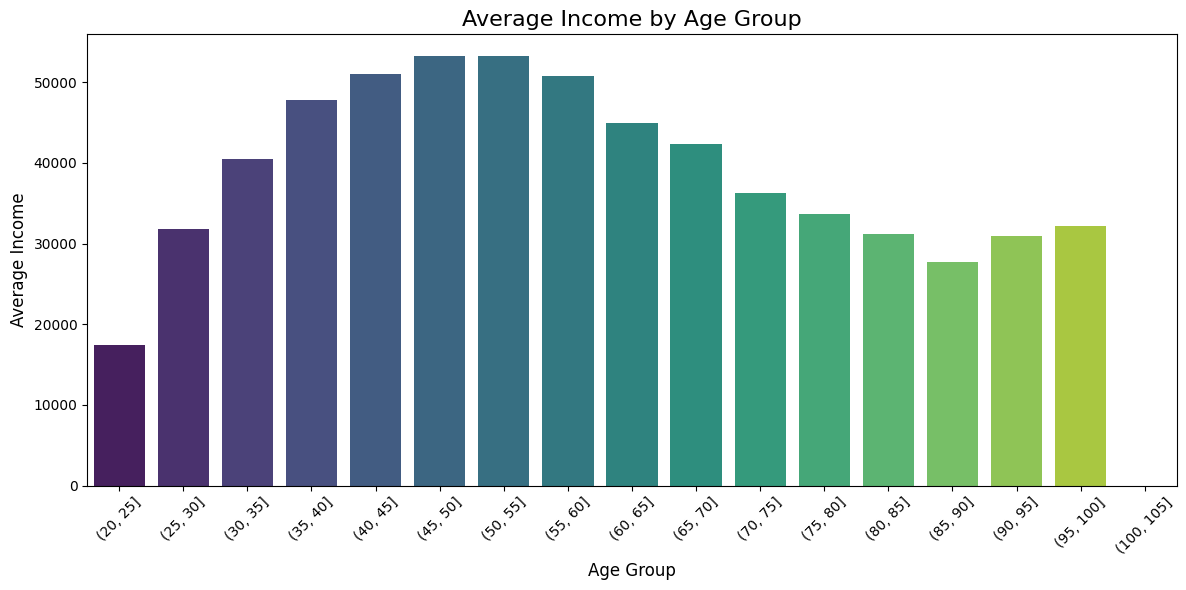

In [202]:
# How does age affect income?
# group ages in bins of 5 and calculate the average income for each group
df_filtered_age['age_group'] = pd.cut(df_filtered_age['age'], bins=range(20, 110, 5))
age_income = df_filtered_age.groupby('age_group')['income'].mean()

#Now i want a bar plor with age in x axis and income in y axis
plt.figure(figsize=(12, 6))
sns.barplot(x=age_income.index, y=age_income.values, palette='viridis')
plt.title('Average Income by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Income', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

## Gas_usage

In [203]:
df['gas_usage'].describe()

count    70772.000000
mean        41.230501
std         63.149323
min          1.000000
25%          3.000000
50%         10.000000
75%         60.000000
max        570.000000
Name: gas_usage, dtype: float64

Number of NaN in gas_usage : 1686


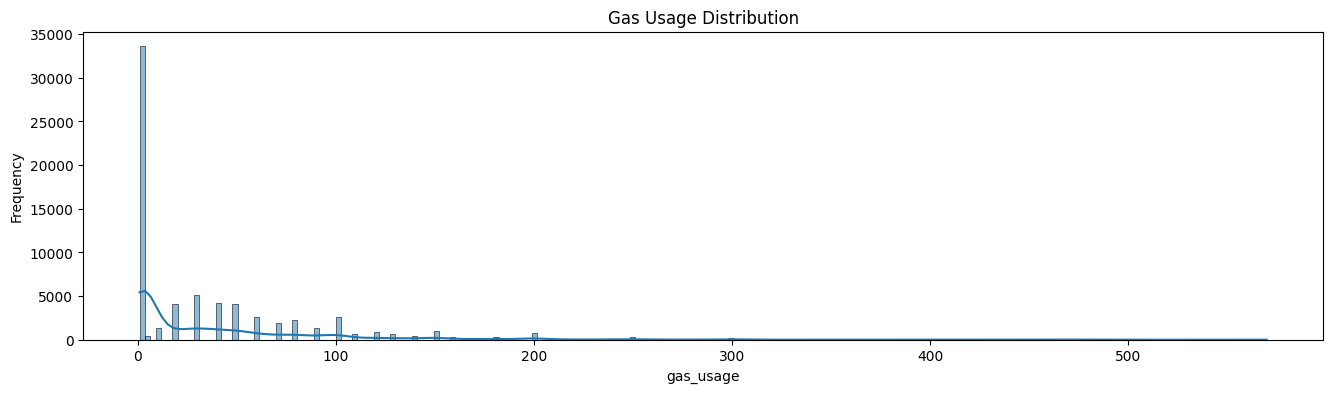

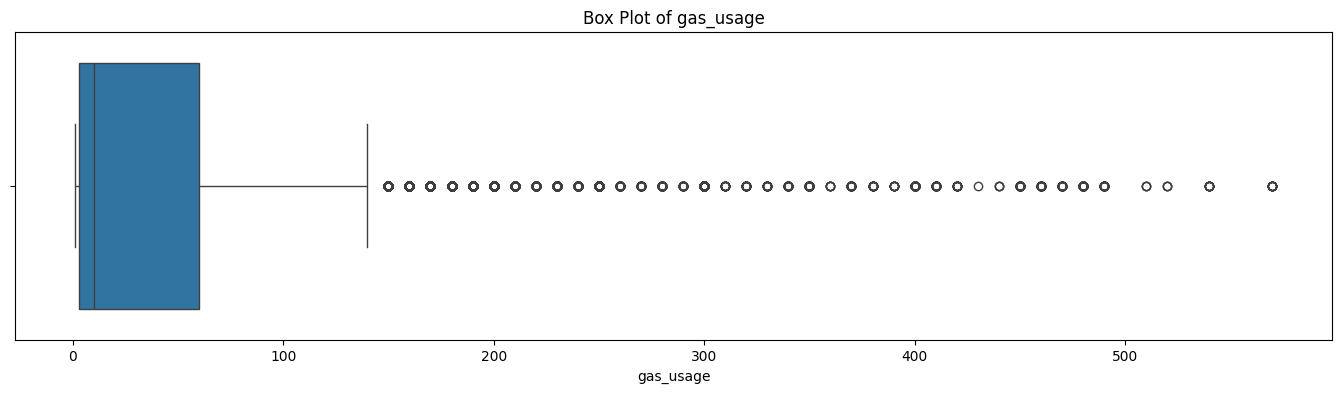

In [204]:
print(f"Number of NaN in gas_usage : {df['gas_usage'].isnull().sum()}")

plt.figure(figsize=(16, 4))
sns.histplot(df['gas_usage'], kde=True)
plt.title("Gas Usage Distribution")
plt.xlabel("gas_usage")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(17, 4))
sns.boxplot(x=df['gas_usage'])
plt.title(f'Box Plot of gas_usage')
plt.show()

Gas usage also have outliers and have 1686 missing values too

## Rooms

rooms
2                 12230
3                 12134
5                 12098
1                 12042
6                 11999
4                 11955
Missing values        0
Name: count, dtype: int64


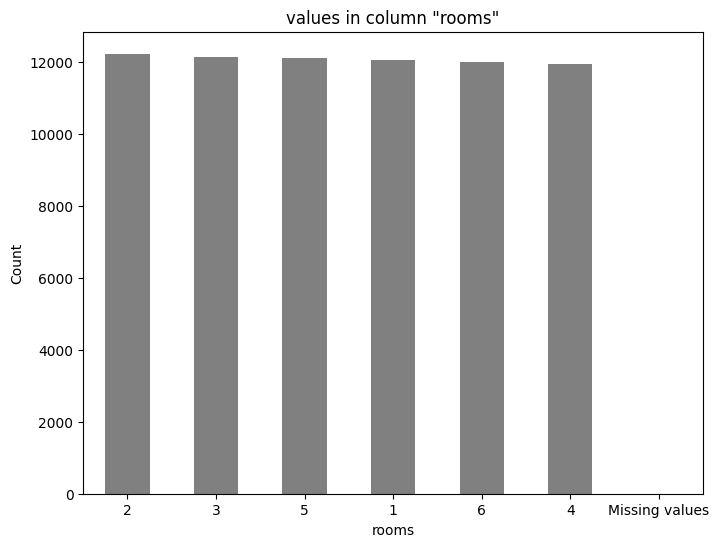

In [205]:
rooms_counts = df['rooms'].value_counts()
rooms_counts['Missing values'] = df['rooms'].isnull().sum()
print(rooms_counts)
plt.figure(figsize=(8, 6)) 
rooms_counts.plot(kind='bar',color=['gray'])
plt.title('values in column "rooms"')
plt.xlabel('rooms')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Rooms, have a ballanced distribution without any missing value

## Recent_move_b

recent_move_b
F                 61773
T                  8998
Missing values     1687
Name: count, dtype: int64


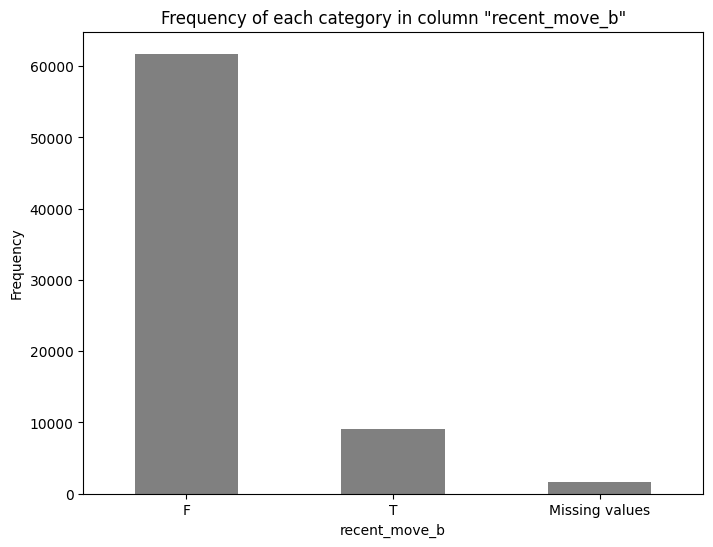

In [206]:
recent_move_b_counts = df['recent_move_b'].value_counts()
recent_move_b_counts['Missing values'] = df['recent_move_b'].isnull().sum()
print(recent_move_b_counts)
plt.figure(figsize=(8, 6)) 
recent_move_b_counts.plot(kind='bar',color=['gray'])
plt.title('Frequency of each category in column "recent_move_b"')
plt.xlabel('recent_move_b')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

recent_move_b have 1687 missing values and its unballanced

In [207]:
# States with most recent moves. Filter for recent moves = True
recent_moves = df[df['recent_move_b'] == 'T']
recent_moves['state_of_res'].value_counts().head(5)

state_of_res
California    1001
Texas          885
Florida        661
New York       380
Illinois       345
Name: count, dtype: int64

/var/folders/sv/gxsvk5v96llb5jl5wq8sxllh0000gn/T/ipykernel_46647/2605464244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_moves['age_group'] = pd.cut(recent_moves['age'], bins=range(20, 110, 10))
/var/folders/sv/gxsvk5v96llb5jl5wq8sxllh0000gn/T/ipykernel_46647/2605464244.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_recent_moves = recent_moves.groupby('age_group').size()
/var/folders/sv/gxsvk5v96llb5jl5wq8sxllh0000gn/T/ipykernel_46647/2605464244.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be 

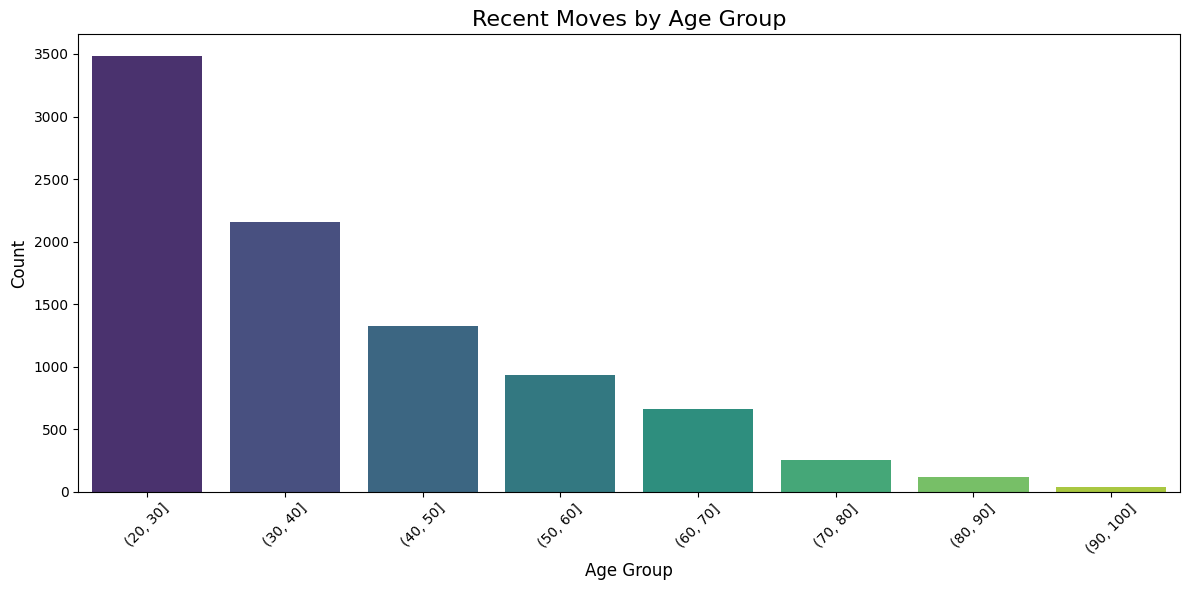

In [208]:
# What age do people move the most?
recent_moves['age_group'] = pd.cut(recent_moves['age'], bins=range(20, 110, 10))
age_recent_moves = recent_moves.groupby('age_group').size()

plt.figure(figsize=(12, 6))
sns.barplot(x=age_recent_moves.index, y=age_recent_moves.values, palette='viridis')

plt.title('Recent Moves by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Younger people tend to having moved recently more than older people.

/var/folders/sv/gxsvk5v96llb5jl5wq8sxllh0000gn/T/ipykernel_46647/381469379.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=housing_recent_moves.index, y=housing_recent_moves.values, palette='viridis')


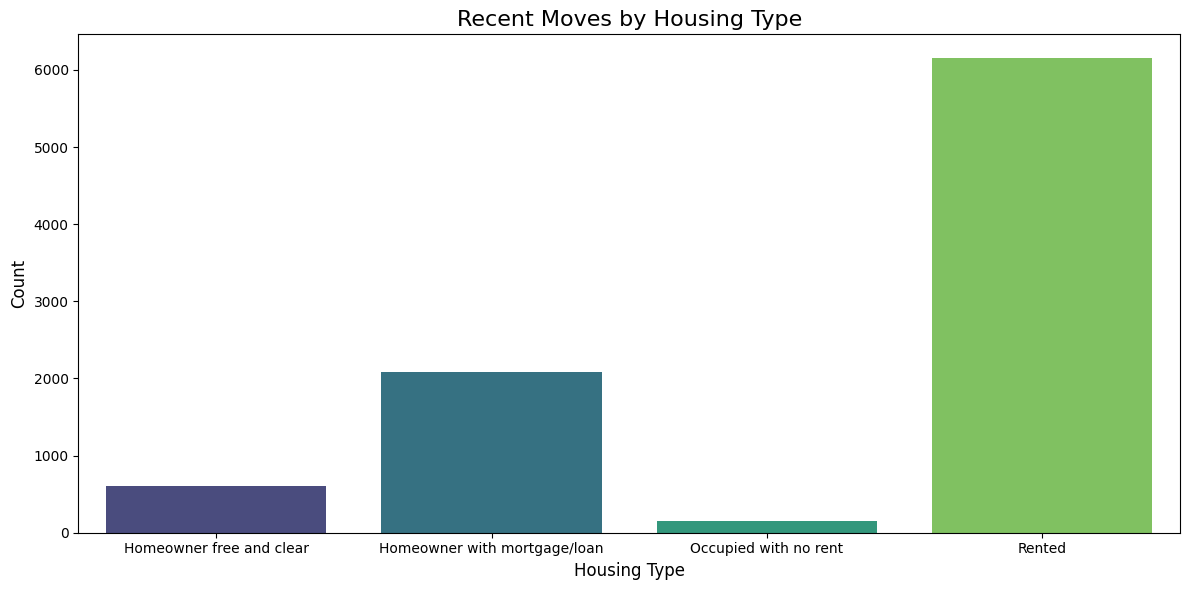

In [209]:
# Correlation between housing type and recent moves

housing_recent_moves = recent_moves.groupby(['housing_type']).size()
plt.figure(figsize=(12, 6))
sns.barplot(x=housing_recent_moves.index, y=housing_recent_moves.values, palette='viridis')
plt.title('Recent Moves by Housing Type', fontsize=16)
plt.xlabel('Housing Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

People who have moved recently tend to be in a rented house.

## State_of_res

In [210]:
df['state_of_res'].describe()

count          72458
unique            51
top       California
freq            8870
Name: state_of_res, dtype: object

/var/folders/sv/gxsvk5v96llb5jl5wq8sxllh0000gn/T/ipykernel_46647/136571102.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')


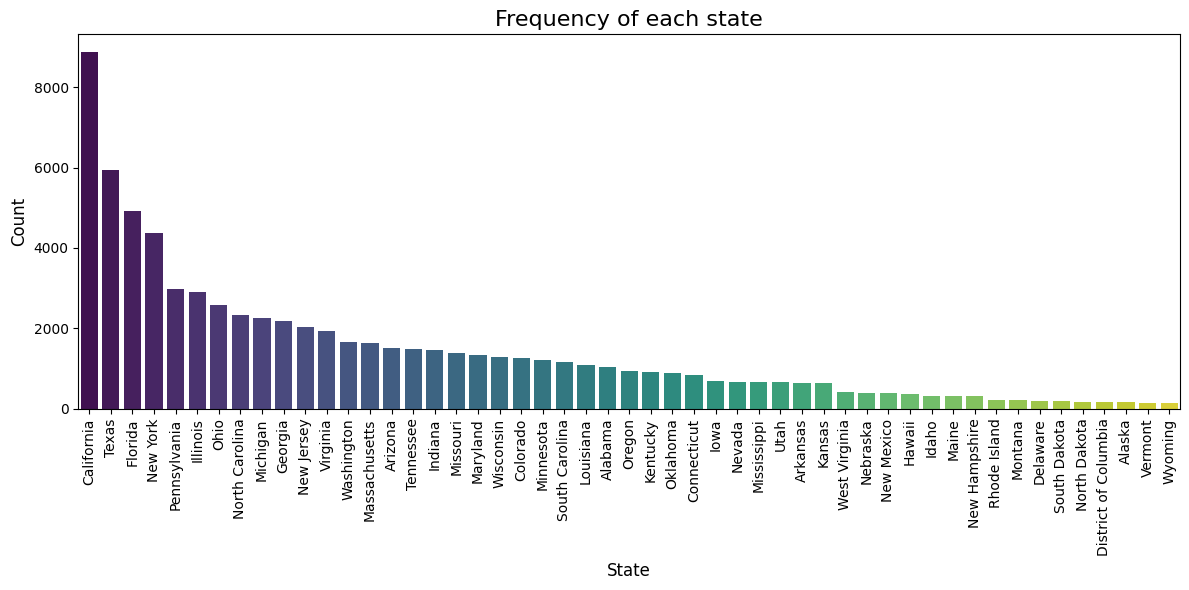

In [213]:
# plot frequency of each state
state_counts = df['state_of_res'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')
plt.title('Frequency of each state', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

/var/folders/sv/gxsvk5v96llb5jl5wq8sxllh0000gn/T/ipykernel_46647/1781077525.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_age.index, y=state_age.values, palette='viridis')


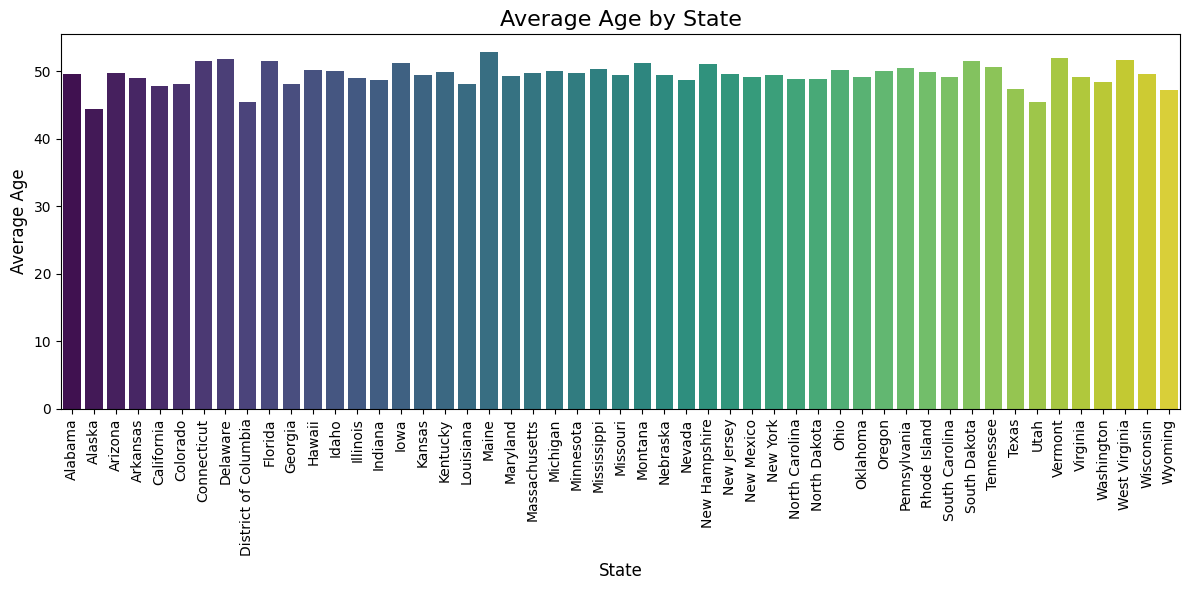

In [214]:
# mean age for each state
state_age = df.groupby('state_of_res')['age'].mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=state_age.index, y=state_age.values, palette='viridis')
plt.title('Average Age by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Average Age', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

/var/folders/sv/gxsvk5v96llb5jl5wq8sxllh0000gn/T/ipykernel_46647/2746941487.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_income.index, y=state_income.values, palette='viridis')


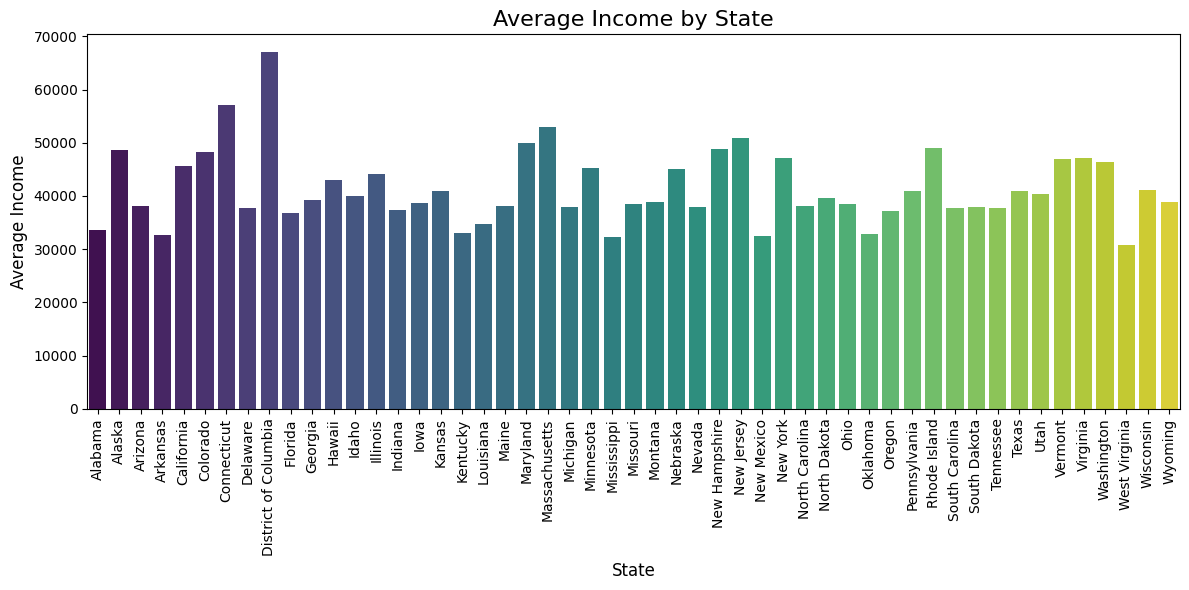

In [215]:
# Mean income for each state
state_income = df.groupby('state_of_res')['income'].mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=state_income.index, y=state_income.values, palette='viridis')
plt.title('Average Income by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Average Income', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()